In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Table of Contents
- [Plots](#plots)
    - [Graph (plt)](#graph)
    - [Scatter Plots (df, plt)](#scatter)
    - [lmplot - Scatter + Regression (sns)](#lmplot)
    - [Histogram (df)](#hist)
    - [Boxplot (df, plt, sns)](#boxplot)
    - [Jointplot (hist + scatter) (sns)](#jointplot)
    - [Barplot (sns)](#barplot)
    - [Violinplot (sns)](#violin)
    - [heatmap (sns)](#heatmap)
    - [Distplot - histogram + graph (sns)](#distplot)
    - [Plot Standard Error (plt)](#error_bar_plt)
    - [Fill_between (plt)](#fill_between)
    - [Pairplot - plot kinda everything (sns)](#pairplot)
- [Subplots](#subplots)
- [Commands](#cmds)
    - [df-plot commands](#df_plot_commands)
    - [plt commands](#plt_cmds)
    - [sns commands](#sns_cmds)

In [47]:

df = pd.DataFrame(data = {'Name':['Dhanashri', 'Smita', 'Rutuja','Sunita', 'Poonam', 'Srushti'],
                            'Age':[ 20, 18, 27, 50, 12, 15],
                            'Age2': [23, 12, 15, 45, 25, 53],
                            'Cat2': ['a', 'a', 'b','b', 'b', 'a'],
                            'Cat3': ['c', 'd', 'd','d', 'c', 'c']})

# Plots: <a class='anchor' id='plots'></a>

## Graph: <a class='anchor' id='graph'></a>

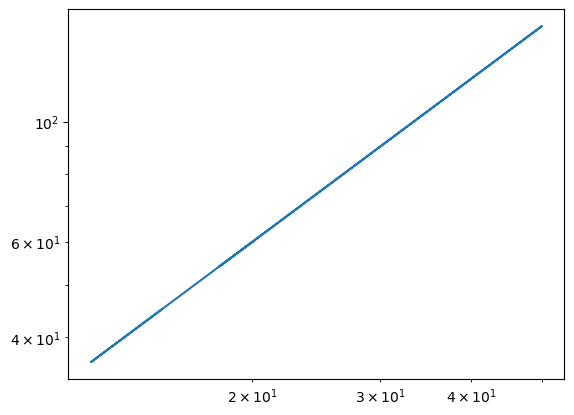

In [34]:
plt.plot(df['Age'], df['Age'].mul(3))
plt.show()

''' 
logarithmic axis:       plt.loglog(df['Age'], df['Age'].mul(3))

'''

## Scatter Plot: <a class='anchor' id='scatter'></a>

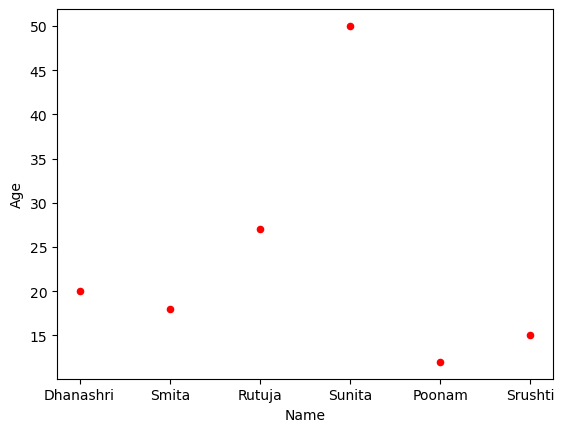

In [12]:
#df
df.plot.scatter(x='Name', y='Age', c='red')
#df.plot.scatter(x='Name', y='Age', s='Age' c='red') #s = size -> bigger Age = bigger dot
plt.show()

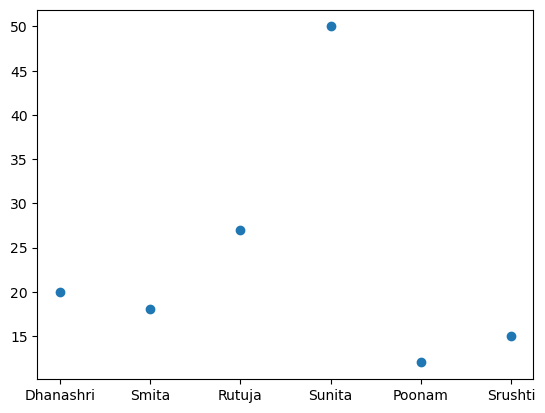

In [13]:
#plt
plt.scatter(df['Name'], df['Age'])
plt.show()

## lmplot: <a class='anchor' id='lmplot'></a>

'\nfollow up with pearson and spearman correlation.\nUse "hue" to compare different groups: sns.lmplot(x=\'Age2\',y=\'Age\', data=df, hue=\'Cat2\')\n'

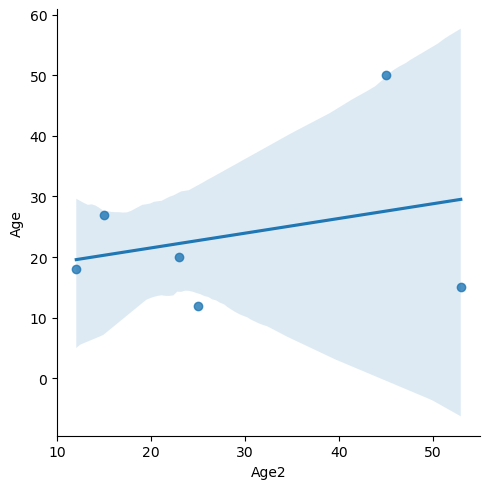

In [50]:
sns.lmplot(x='Age2',y='Age', data=df)

'''
follow up with pearson and spearman correlation.
Use "hue" to compare different groups: sns.lmplot(x='Age2',y='Age', data=df, hue='Cat2')
'''


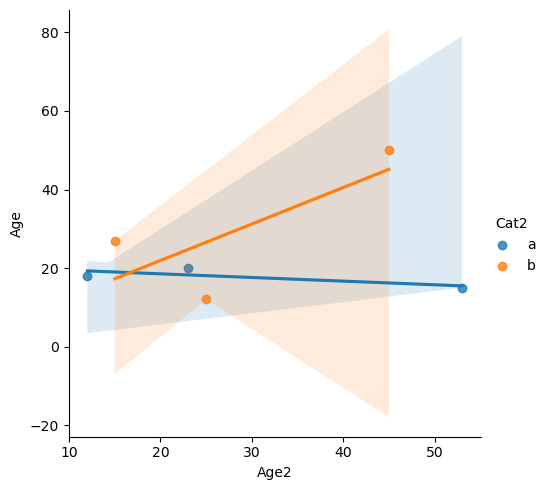

In [51]:
sns.lmplot(x='Age2',y='Age', data=df, hue='Cat2')

## Histogram: <a class='anchor' id='hist'></a>
for continuous data (barplot for categorical)

<AxesSubplot:>

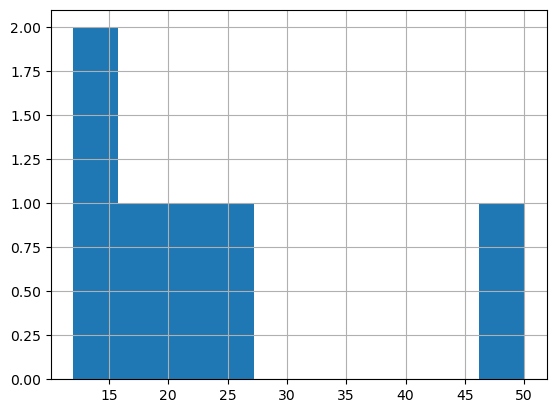

In [14]:
df['Age'].hist()
#df['Age'].hist(bins=nbr_bins)
'''
bins = nbr_bins         Change number of bins
histtype='step'         draws the histogram with a graph instead of bars
log=True                log y axis
cumulative=-1           cumulative function (to get a straight line in a loglog plot of a skewed distribution/power law)

Use groupby:
df.groupby('Name')[age].hist()
'''

Transform a histrogram to a graph plot:

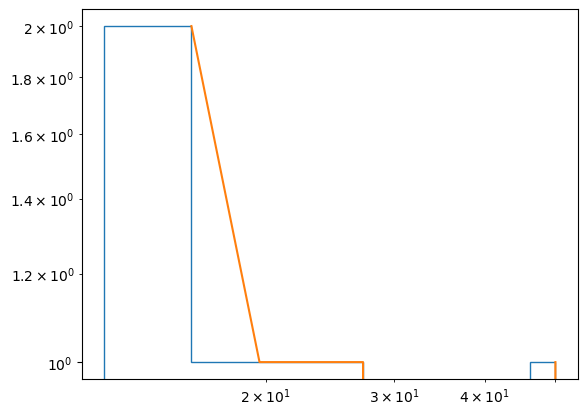

In [32]:
temporary = plt.hist(df['Age'], histtype='step')

plt.plot(temporary[1][1:],temporary[0])
#plt.loglog(temporary[1][1:],temporary[0])

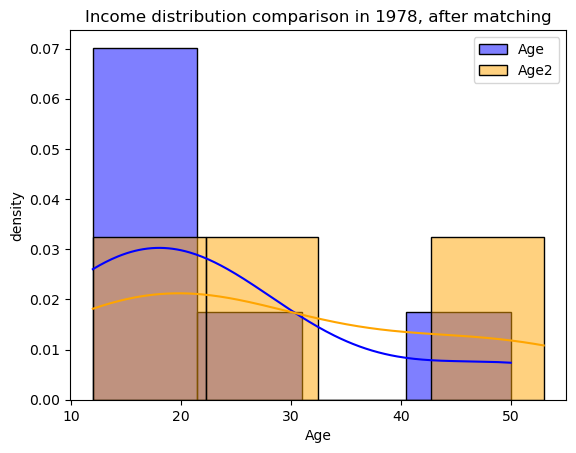

In [54]:
ax = sns.histplot(df['Age'], kde=True, stat='density', color='blue', label='Age')
ax = sns.histplot(df['Age2'], kde=True, stat='density', color='orange', label='Age2')
ax.set(title='Income distribution comparison in 1978, after matching',xlabel='Age', ylabel='density')
plt.legend()
plt.show()

## Barplot: <a class='anchor' id='barplot'></a>
For categorical data (hist for continuous data)

' Choose only a given set of categories:\nax = sns.barplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies[\'Main_Genre\'].isin([\'Thriller\',\'Comedy\',\n                                                                                      \'Fantasy\',\'Sci-Fi\',\'Romance\'])])\n'

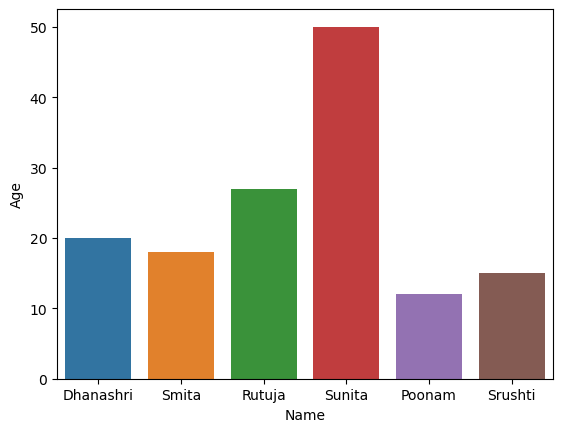

In [15]:
sns.barplot(x='Name', y='Age',data=df)

''' Choose only a given set of categories:
ax = sns.barplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance'])])
'''

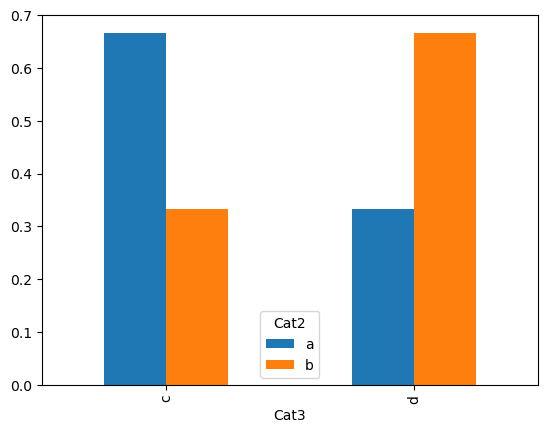

In [48]:
group = df.groupby(['Cat3', 'Cat2'])['Cat2'].count()
group = group.unstack()
group = group.div(group.sum(axis=1), axis=0)
pl = group.plot(kind='bar')
plt.show()

### Horizontal Bar:

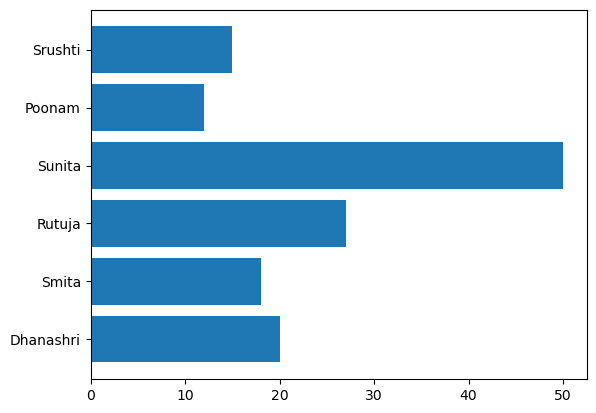

In [55]:
plt.barh(df['Name'], df['Age'])
plt.show()

## Boxplot: <a class='anchor' id='boxplot'></a>

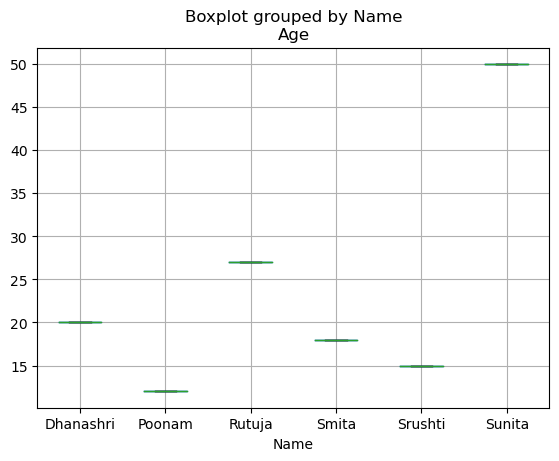

In [16]:
#df
df.boxplot(by='Name', column='Age')
plt.show()

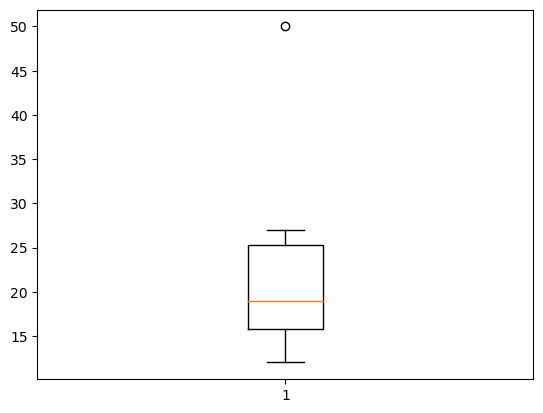

In [17]:
#plt
plt.boxplot(df['Age'])
plt.show()

' Choose a subset of the possible categories:\nax = sns.boxplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies[\'Main_Genre\'].isin([\'Thriller\',\'Comedy\',\n                                                                                      \'Fantasy\',\'Sci-Fi\',\'Romance\'])])'

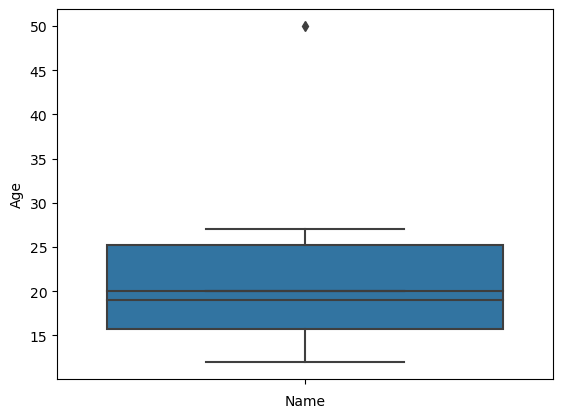

In [18]:
#sns
sns.boxplot(x='Name', y='Age', data=df)
sns.boxplot( y='Age', data=df)

''' Choose a subset of the possible categories:
ax = sns.boxplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance'])])'''

## Jointplot: <a class='anchor' id='jointplot'></a>

"Other kinds:\n'hex'\n'kde' -> like a map with continuous coloring\n'reg' -> scatter plus regression\n"

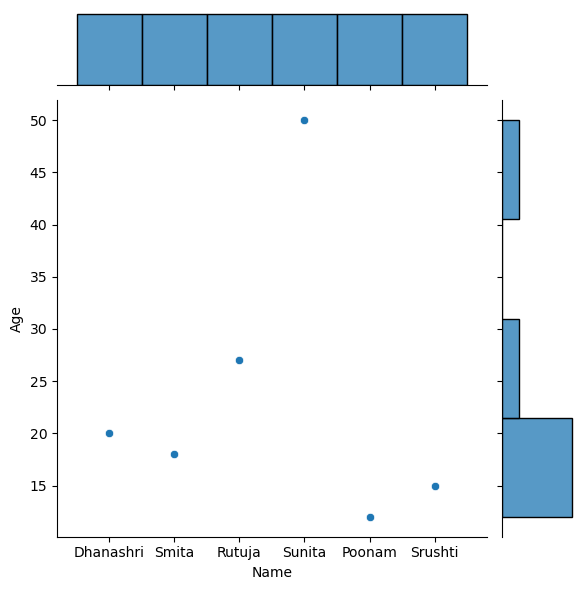

In [19]:
sns.jointplot(x='Name', y='Age', data=df, kind='scatter')

'''Other kinds:
'hex'
'kde' -> like a map with continuous coloring
'reg' -> scatter plus regression
'''

## Violin plot: <a class='anchor' id='violin'></a>

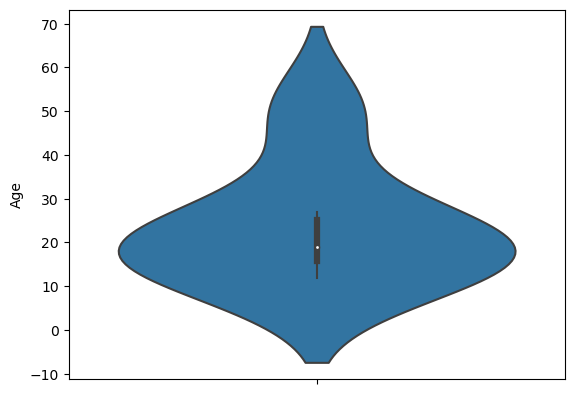

' Choose a subset of the categories\nax = sns.violinplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies[\'Main_Genre\'].isin([\'Thriller\',\'Comedy\',\n                                                                                      \'Fantasy\',\'Sci-Fi\',\'Romance\'])])\n                                                                                      '

In [20]:
#sns.violinplot(x='Name', y='Age',data=df)
sns.violinplot(y='Age',data=df)
plt.show()


''' Choose a subset of the categories
ax = sns.violinplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance'])])
                                                                                      '''

## Heatmap: <a class='anchor' id='heatmap'></a>

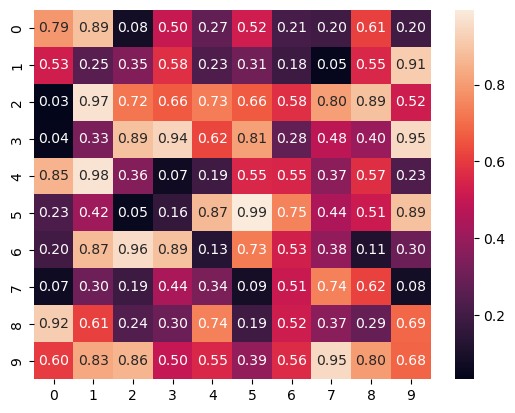

In [21]:
df_heat = pd.DataFrame(np.random.rand(10, 10))

sns.heatmap(df_heat, annot=True, fmt='.2f') #fmt defines how the values are shown (2 decimal numbers)
plt.show()

#To use a different color map, use the following code
#sns.heatmap(df_heat, annot=True, fmt='.2f', cmap='RdYlGn', cbar=True)
'''
most likely it will help to use crosstabs.
You find doucmentation in the summary chapter "Gimmicks"
''' 

## Distplot: <a class='anchor' id='distplot'></a>

c:\Users\flori\anaconda3\envs\ada\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\flori\anaconda3\envs\ada\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


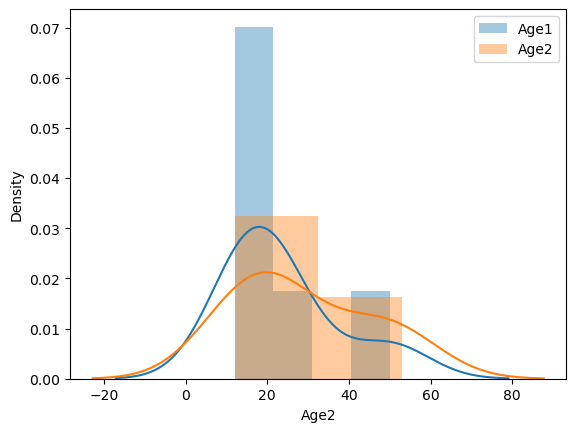

In [22]:
ax = sns.distplot(df['Age'], hist=True, label='Age1')
ax = sns.distplot(df['Age2'], hist=True, label='Age2')

plt.legend()
plt.show()

## Plot error bars: <a class='anchor' id='error_bar_plt'></a>

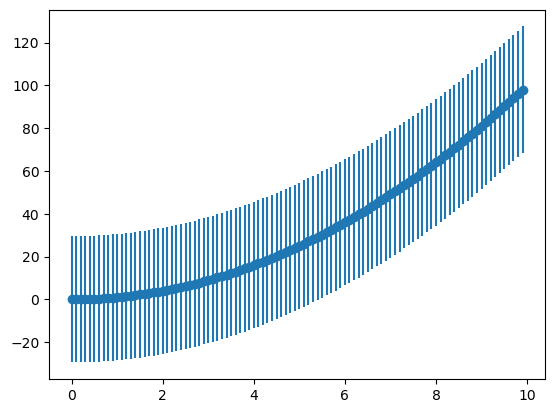

"\nlinestyle: '-', 'none',\ncapsize: caps are the small bars on top and bottom of the error bars (like the tip of inhibition arrow)\n\n"

In [23]:
x = np.arange(0, 10, 0.1)
y = x ** 2
y_std = np.std(y) #calculates the standard deviation of y

plt.errorbar(x, y, yerr=y_std, fmt='o')
plt.show()

#more variable for inside the parentheses are the following:
'''(linewidth = 1, linestyle = 'none', marker = 'o', markersize=3, markerfacecolor = 'black', 
markeredgecolor = 'black', capsize = 5)'''
'''
linestyle: '-', 'none',
capsize: caps are the small bars on top and bottom of the error bars (like the tip of inhibition arrow)

'''


Combine with fill_between: <a class='anchor' id='fill_between'></a>

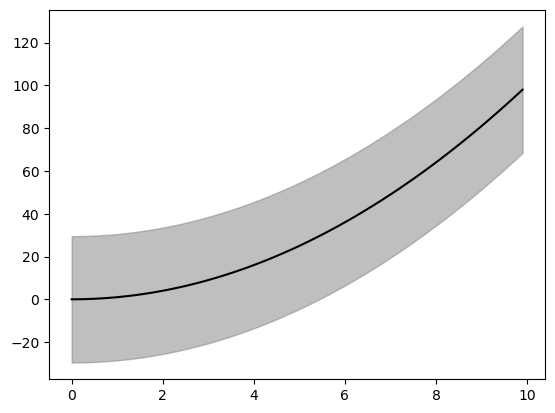

In [24]:
plt.fill_between(x, y-y_std, y+y_std, alpha = 0.5, color = 'gray')
plt.plot(x, y, color = 'black')
plt.show()

## Pairplot: <a class='anchor' id='pairplot'></a>

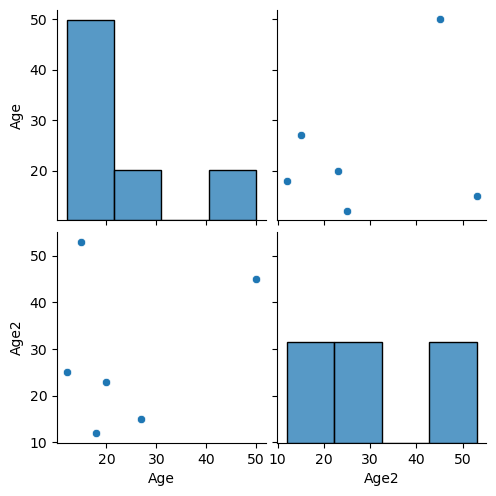

In [42]:
sns.pairplot(df)

# Subplots: <a class='anchor' id='subplots'></a>

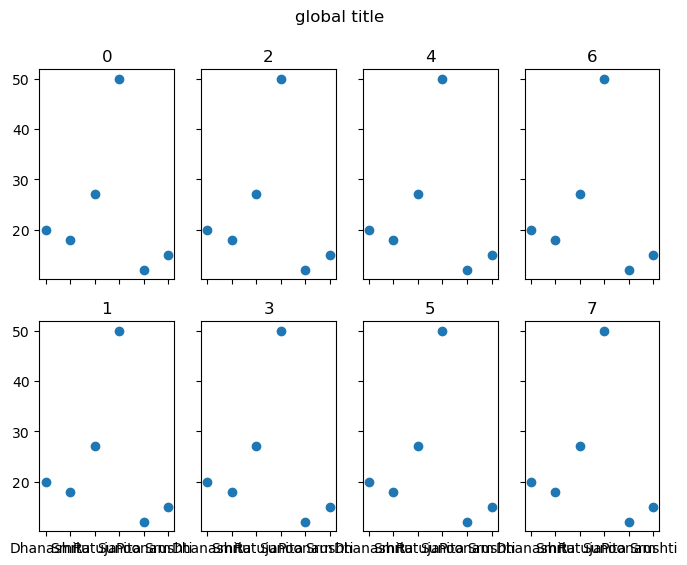

In [25]:
import math
l = 2
w = 4
fig, ax = plt.subplots(l,w, figsize=(8,6), sharey=True, sharex=True)

fig.suptitle('global title')

for i in range(l*w):
    sbplt = ax[i%l, math.floor(i/l)]
    '''you can replace scatter by any other plot'''
    sbplt.scatter(df['Name'], df['Age'])
    sbplt.set_title(i)

'''Iterate over all columns of a dataframe:
c = df.columns
sbplt.scatter(df.index, df[c[i]])
sbplt.set_title(c[i])
'''

'''Print the axis position (i%l)(math.floor(i/l)
#print('i = ' + str(i))
#print(i%2)
#print(math.floor(i/2))
'''


Text(0.5, 1.0, 'subtitle 2')

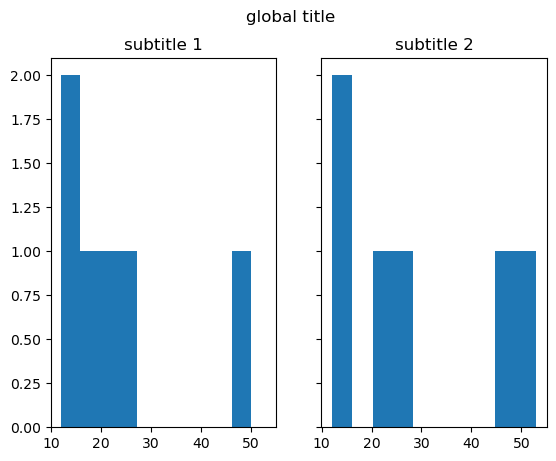

In [41]:
fig, ax = plt.subplots(1,2,sharex=True, sharey=True)

fig.suptitle('global title')

ax[0].hist(df['Age'])
ax[0].set_title('subtitle 1')
ax[1].hist(df['Age2'])
ax[1].set_title('subtitle 2')

# Commands: <a class='anchor' id='cmds'></a>

## General df plot commands: <a class='anchor' id='df_plot_commands'></a>

In [26]:
#(grid=True/False)


## General plt commands: <a class='anchor' id='plt_cmds'></a>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


"plt.vline(x, y_min, y_max, linestile='dashed') "

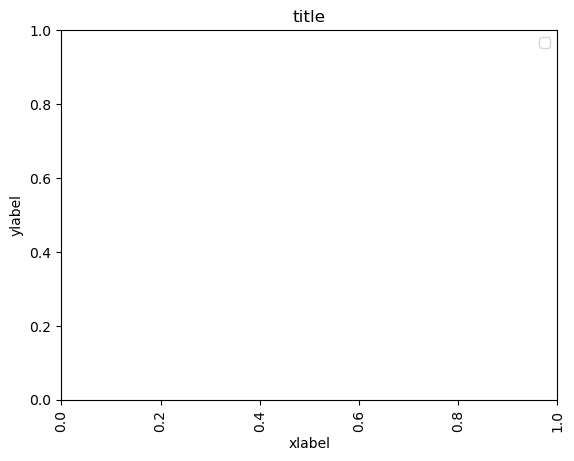

<Figure size 600x500 with 0 Axes>

In [28]:
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('title')

plt.xticks(rotation='vertical')
plt.yticks()

plt.legend()

plt.figure(figsize=(6,5))

#draw a vertical line
'''plt.vline(x, y_min, y_max, linestile='dashed') '''
#example: plt.vlines(5, 0, 12, linestyles='dashed')


## General sns commands: <a class='anchor' id='sns_cmds'></a>

In [ ]:
'''ax= sns.function() '''


ax.set(title='Your title', xlabel='xlabel', ylabel='ylabel')
plt.xticks(rotation=90)




To have several plots in the same figure you just plot them on the same ax.<br>